
  minimum support = 0.01 and minimum confidence threshold = 0.1, the association  rules generated : 

          antecedents         consequents  antecedent support  \
0        (rolls/buns)  (other vegetables)            0.111000   
1  (other vegetables)        (whole milk)            0.118250   
2        (rolls/buns)        (whole milk)            0.111000   
3              (soda)        (whole milk)            0.097125   
4            (yogurt)        (whole milk)            0.087750   

   consequent support   support  confidence      lift  leverage  conviction  \
0             0.11825  0.011250    0.101351  0.857094 -0.001876    0.981195   
1             0.15800  0.014250    0.120507  0.762705 -0.004433    0.957370   
2             0.15800  0.014375    0.129505  0.819649 -0.003163    0.967265   
3             0.15800  0.012750    0.131274  0.830849 -0.002596    0.969236   
4             0.15800  0.011500    0.131054  0.829457 -0.002365    0.968990   

   zhangs_metric  
0      -0.15

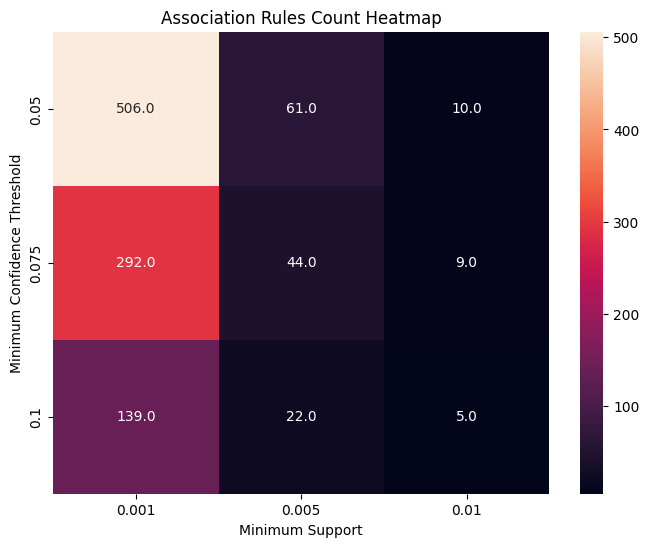


Association Rules for Subset 1:
             antecedents         consequents  antecedent support  \
0         (bottled beer)  (other vegetables)             0.04250   
1         (bottled beer)        (whole milk)             0.04250   
2        (bottled water)  (other vegetables)             0.05950   
3        (bottled water)        (whole milk)             0.05950   
4          (canned beer)        (whole milk)             0.05000   
5         (citrus fruit)        (whole milk)             0.04750   
6          (frankfurter)  (other vegetables)             0.03400   
7          (frankfurter)        (whole milk)             0.03400   
8    (frozen vegetables)  (other vegetables)             0.03075   
9           (newspapers)        (whole milk)             0.04175   
10           (pip fruit)  (other vegetables)             0.04700   
11    (other vegetables)        (rolls/buns)             0.12300   
12          (rolls/buns)  (other vegetables)             0.10850   
13     (root ve

Loading Data:   0%|          | 0/4 [00:00<?, ?it/s]

(128, 128, 3)
Training model with filter size (3, 3)...


Training Progress:   0%|          | 0/20 [00:00<?, ?it/s]

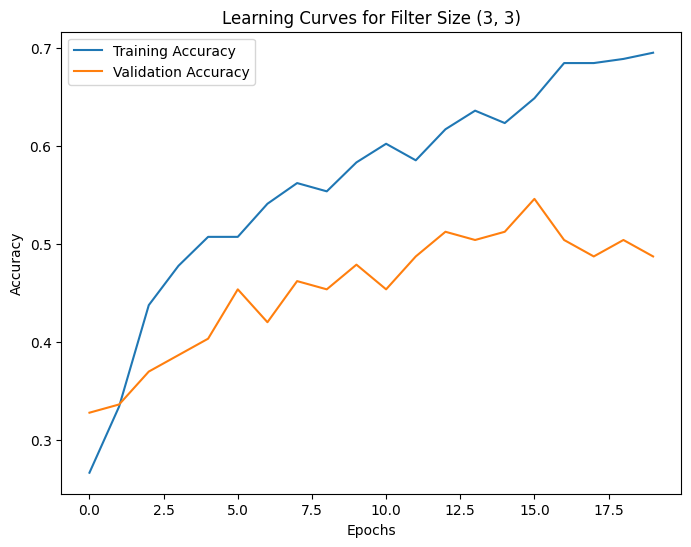

Performance for Filter Size (3, 3):
Training Loss: 0.8307, Training Accuracy: 63.68%

Training model with filter size (5, 5)...


Training Progress:   0%|          | 0/20 [00:00<?, ?it/s]

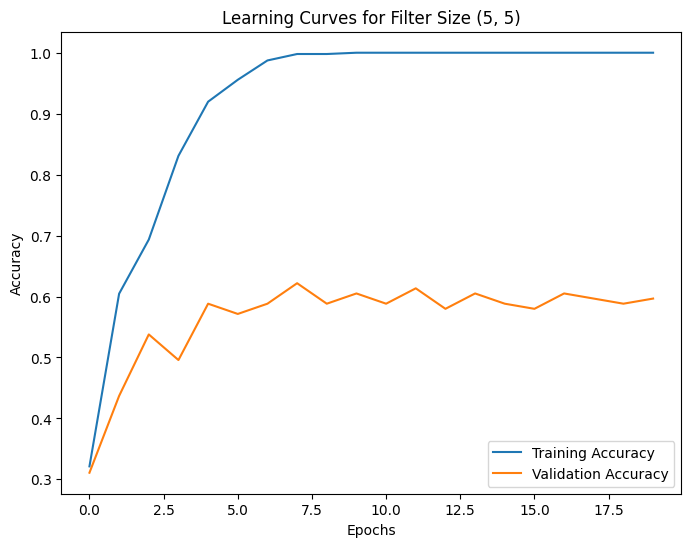

Performance for Filter Size (5, 5):
Training Loss: 0.2961, Training Accuracy: 91.89%

Training model with filter size (7, 7)...


Training Progress:   0%|          | 0/20 [00:00<?, ?it/s]

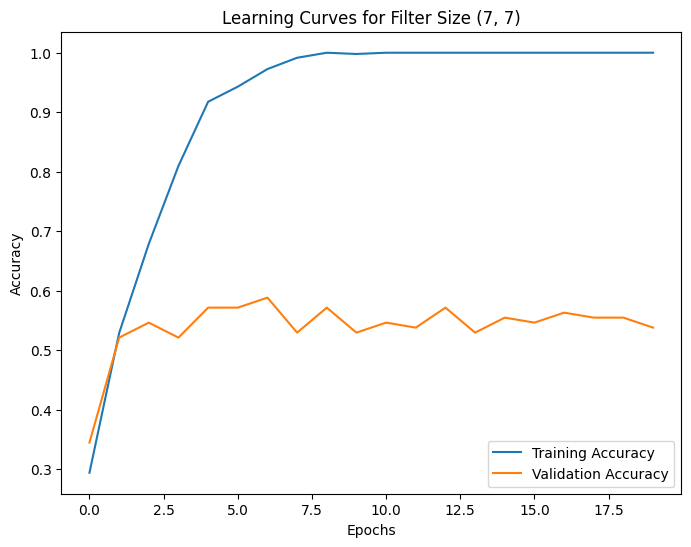

Performance for Filter Size (7, 7):
Training Loss: 0.4172, Training Accuracy: 90.71%



In [66]:
import cv2
import os
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")
from keras.callbacks import Callback
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tqdm import tqdm
from tqdm.notebook import tqdm
groceries= pd.read_csv(r"C:\Users\mohan\Downloads\Grocery_Items_7.csv")
grocery_list= [row.dropna().tolist() for index, row in groceries.iterrows()]
te = TransactionEncoder()
te_ary = te.fit(grocery_list).transform(grocery_list)
data = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(data, min_support=0.01, use_colnames=True)
ar=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
print("\n  minimum support = 0.01 and minimum confidence threshold = 0.1, the association  rules generated : \n")
print(ar)

msv =[ 0.001, 0.005, 0.01]
mct =[ 0.05, 0.075, 0.1]
rows = []
for i in msv:
    items = apriori(data, min_support=i, use_colnames=True)
    for j in mct:
        ar = association_rules(items, metric="confidence", min_threshold=j)
        # Append row to the list
        rows.append({'msv': i, 'mct': j, 'count': len(ar)})
dataset = pd.DataFrame(rows)
glue = dataset.pivot(index='mct', columns='msv', values='count')
plt.figure(figsize=(8, 6))
sns.heatmap(glue, annot=True, fmt=".1f")
plt.title("Association Rules Count Heatmap")
plt.xlabel("Minimum Support")
plt.ylabel("Minimum Confidence Threshold")
plt.show()

s1 = data.iloc[:len(data)//2]
s2 = data.iloc[len(data)//2:]
s1_frequent_itemsets = apriori(s1, min_support=0.005, use_colnames=True)
s2_frequent_itemsets = apriori(s2, min_support=0.005, use_colnames=True)
s1_association_rules = association_rules(s1_frequent_itemsets, metric="confidence", min_threshold=0.075)
s2_association_rules = association_rules(s2_frequent_itemsets, metric="confidence", min_threshold=0.075)
print("\nAssociation Rules for Subset 1:")
print(s1_association_rules)
print("\nAssociation Rules for Subset 2:")
print(s2_association_rules)
common_rules = pd.merge(s1_association_rules, s2_association_rules, on=['antecedents', 'consequents'])
print("\nCommon Association Rules:")
print(common_rules)


class TQDMProgressBar(Callback):
    def on_train_begin(self, logs=None):
        self.epochs = self.params["epochs"]
        self.tqdm_bar = tqdm(total=self.epochs, desc="Training Progress")

    def on_epoch_end(self, epoch, logs=None):
        self.tqdm_bar.update(1)

    def on_train_end(self, logs=None):
        self.tqdm_bar.close()

def load_and_process_data(dataset_dir):
    X, y = [], []
    class_folders = [
        "C:\\Users\\mohan\\Desktop\\Cropped\\n02091635-otterhound",
        "C:\\Users\\mohan\\Desktop\\Cropped\\n02097209-standard_schnauzer",
        "C:\\Users\\mohan\\Desktop\\Cropped\\n02099712-Labrador_retriever",
        "C:\\Users\\mohan\\Desktop\\Cropped\\n02112137-chow",
    ]
    for class_index, folder_name in tqdm(enumerate(class_folders), total=len(class_folders), desc="Loading Data"):
        folder_path = os.path.join(dataset_dir, folder_name)
        for filename in os.listdir(folder_path):
            # img = np.load(os.path.join(folder_path, filename))

            img = Image.open(os.path.join(folder_path, filename))

            X.append(img)
            y.append(class_index)
    X = np.array(X) / 255.0
    y = to_categorical(y, num_classes=4)
    if X.ndim == 3:
        X = np.expand_dims(X, axis=-1)
    return train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def build_model(input_shape, filter_size=(3, 3)):
    model = Sequential([
        Conv2D(8, filter_size, activation="relu", input_shape=input_shape),
        MaxPooling2D(2),
        Flatten(),
        Dense(16, activation="relu"),
        Dense(4, activation="softmax"),
    ])
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

def train_and_evaluate_model(model, X_train, y_train, filter_size):
    tqdm_callback = TQDMProgressBar()
    history = model.fit(
        X_train,
        y_train,
        epochs=20,
        batch_size=32,
        validation_split=0.2,
        callbacks=[tqdm_callback],
        verbose=0  # Turn off the default Keras progress bar
    )
    plot_learning_curves(history, filter_size)
    evaluate_model_performance(model, X_train, y_train, filter_size)

def plot_learning_curves(history, filter_size):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title(f"Learning Curves for Filter Size {filter_size}")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

def evaluate_model_performance(model, X_train, y_train, filter_size):
    train_score = model.evaluate(X_train, y_train, verbose=0)
    print(f"Performance for Filter Size {filter_size}:")
    print(f"Training Loss: {train_score[0]:.4f}, Training Accuracy: {train_score[1]*100:.2f}%\n")

dataset_dir = r"C:\Users\mohan\Desktop\Cropped"
X_train, X_test, y_train, y_test = load_and_process_data(dataset_dir)
input_shape = X_train.shape[1:]
print(input_shape)

print(f"Training model with filter size {(3, 3)}...")
model = build_model(input_shape, (3, 3))
train_and_evaluate_model(model, X_train, y_train, (3, 3))

print(f"Training model with filter size {(5, 5)}...")
model = build_model(input_shape, (5, 5))
train_and_evaluate_model(model, X_train, y_train, (5, 5))

print(f"Training model with filter size {(7, 7)}...")
model = build_model(input_shape, (7, 7))
train_and_evaluate_model(model, X_train, y_train, (7, 7))

In [63]:
# Based on the given performance metrics and learning curves, we can make several observations:
# The model with the (3, 3) filter size has the highest training accuracy of 63.68% and a
# training loss of 0.2961. A training loss of 0.2723 and a training accuracy of 91.89% are displayed by the model with the (5, 5) filter size. 
# The model with the (7, 7) filter size records a training accuracy of 90.71% and a training loss
# of 0.4172.
# The comparison between models trained with different filter sizes (3x3, 5x5, and 7x7) reveals insights into their performance. 
# Analyzing learning curves and evaluation metrics indicates whether each model is overfitting, underfitting, or performing optimally. 
# Overfitting is signaled by a large gap between training and validation accuracy, with lower validation accuracy and higher loss. 
# Underfitting is indicated by low accuracies and high loss for both training and validation. 
# Conversely, models exhibiting similar high accuracies and low losses for both training and validation are deemed well-balanced, demonstrating optimal performance. 
# Adjustments to architecture or hyperparameters may be made based on these observations to improve model performance.